In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce
import seaborn as sns
from sklearn.decomposition import PCA


/var/folders/4w/wtf2_tr5201bgyqsg1crjv5m0000gn/T/ipykernel_873/2913001458.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [48]:
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv(r'/Users/chutianqi/Downloads/house-prices-advanced-regression-techniques 2/train.csv')

In [4]:
df.shape

(1460, 81)

In [5]:
category_features = set(df.select_dtypes(['O']).columns)

In [6]:
#differentiate numeric variables and categorical variables 
def get_features(df):
    numeric_features = set(df.select_dtypes(['float64', 'int64']).columns)
    numeric_features = numeric_features.difference(set(['SalePrice']))
    category_features = set(df.select_dtypes(['O']).columns)
    return list(numeric_features), list(category_features)  
t1 = get_features(df)

In [7]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
df.isna().sum().sort_values(ascending= False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

### replace missing data 

/var/folders/4w/wtf2_tr5201bgyqsg1crjv5m0000gn/T/ipykernel_873/3278807252.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= missing.index, y= 'percent', data = missing, palette='Reds_r' )


,PoolQC,MiscFeature,Alley,Fence,MasVnrType,FireplaceQu,LotFrontage,GarageYrBlt,GarageCond,GarageType,GarageFinish,GarageQual,BsmtFinType2,BsmtExposure,BsmtQual,BsmtCond,BsmtFinType1,MasVnrArea,Electrical
total,1453.000000,1406.000000,1369.000000,1179.000000,872.000000,690.000000,259.000000,81.000000,81.000000,81.000000,81.000000,81.000000,38.000000,38.000000,37.000000,37.000000,37.000000,8.000000,1.000000
percent,99.520548,96.301370,93.767123,80.753425,59.726027,47.260274,17.739726,5.547945,5.547945,5.547945,5.547945,5.547945,2.602740,2.602740,2.534247,2.534247,2.534247,0.547945,0.068493


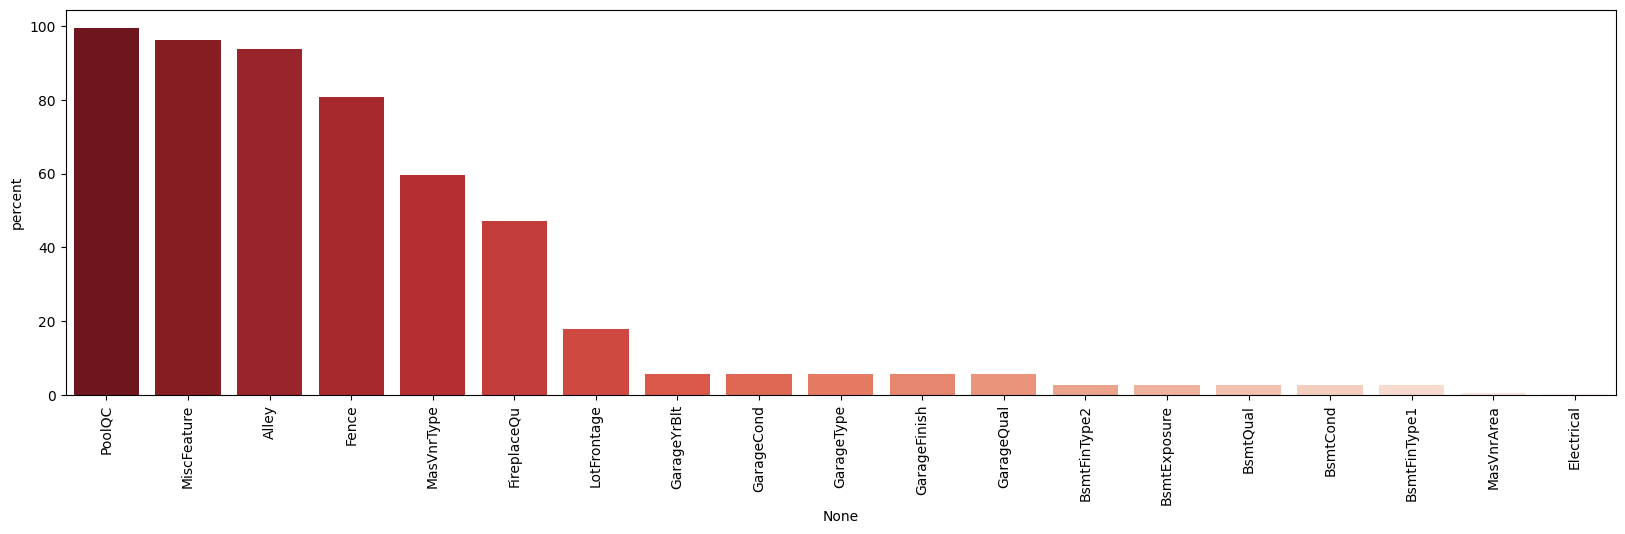

In [9]:
def missing_percentage(df):
    "a funtion for returning missing ratios"
    total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = (df.isnull().sum().sort_values(ascending = False)/len(df)*100)[df.isnull().sum().sort_values(ascending = False)/len(df) * 100 != 0]
    return pd.concat([total, percent], axis= 1, keys=['total','percent'] ) 

missing = missing_percentage(df)
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x= missing.index, y= 'percent', data = missing, palette='Reds_r' )
plt.xticks(rotation = 90)
display(missing.T.style.background_gradient(cmap= 'Reds', axis = 1))

In [10]:
### replacement 
# none_cols = ['PoolQC', 'MiscFeature', 'Alley',	'Fence',	'MasVnrType',	'FireplaceQu',	'LotFrontage',	'GarageYrBlt',	'GarageCond',	'GarageType',	'GarageFinish',	'GarageQual',	'BsmtFinType2']
# for col in none_cols:
#     df[col].replace(np.nan,'None', inplace = True)
#drop missing rate above 50% columns 
# df_new = df.drop(axis = 1, columns=['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu'])
# # fill list
# def get_features(df):
#     numeric_features = set(df.select_dtypes(['float64', 'int64']).columns)
#     numeric_features = numeric_features.difference(set(['SalePrice']))
#     category_features = set(df.select_dtypes(['O']).columns)
#     return list(numeric_features), list(category_features)

# def fill_missing_values(df):
#     numeric_features, category_features = get_features(df)
#     for col in numeric_features+category_features:
#         if col in category_features:
#             #fill missing value in catagorial variables with most frequent value
#             df[col].fillna(df[col].mode().iloc[0],inplace = True)
#         else:
#             df[col].fillna(df[col].median(),inplace = True)
        
#     return df 



In [15]:
#list of 'NaN' including columns where NaN's mean none 
none_col = ['Alley','PoolQC','MiscFeature','Fence','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType2','BsmtFinType1']

#list of 'NaN' including columns where NaN's mean 0
zero_col = ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtHalfBath','BsmtFullBath','GarageYrBlt','GarageYrBlt','GarageArea','GarageCars','MasVnrArea']
#list of 'NaN' including columns where NaN's actually missing gonna replaced with mode
freq_col = ['Electrical','Exterior1st','Exterior2nd','Functional','KitchenQual','SaleType','Utilities']

#filling the list of columns above with values
for col in none_col:
    df[col].replace(np.nan,0,inplace = True)
    
for col in zero_col:
    df[col].replace(np.nan,'None',inplace = True)
    
for col in freq_col:
    df[col].replace(np.nan,df[col].mode()[0],inplace = True)


/var/folders/4w/wtf2_tr5201bgyqsg1crjv5m0000gn/T/ipykernel_873/1361242958.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace(np.nan,'None',inplace = True)
/var/folders/4w/wtf2_tr5201bgyqsg1crjv5m0000gn/T/ipykernel_873/1361242958.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

In [19]:
#use dummy to transfer classification variables into number
    
def replace_category_with_dummy_datasets(df):
    _, category_features = get_features(df)
    for feature in category_features:
        dummies = pd.get_dummies(df[feature], prefix=feature)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(columns=[feature])

    return df
    
df2 = replace_category_with_dummy_datasets(df)
df2.head()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageCond_TA,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,True,True,False,False,False,False,True,False,False,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,True,True,False,False,False,True,False,False,False,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,True,True,False,False,False,False,True,False,False,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,True,True,False,False,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,True,True,False,False,False,False,True,False,False,False


In [20]:
### nosiy data 
df2.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### data integration 

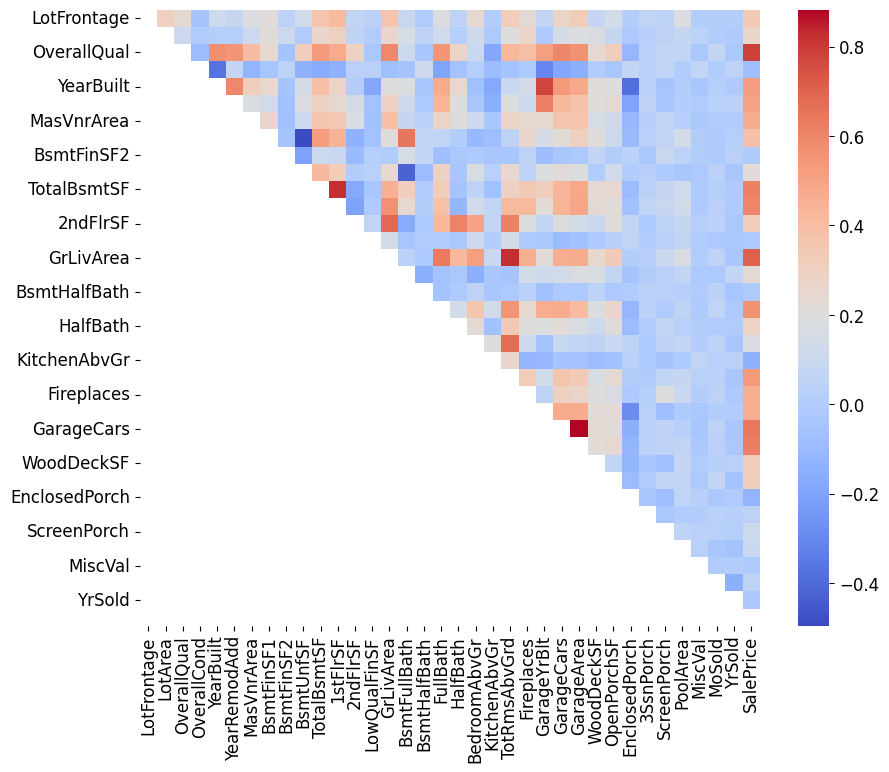

In [24]:
# Calculate the correlation matrix,drop classification varaibles first 
category_features = set(df.select_dtypes(['O']).columns)
temp = df.drop(category_features,axis =1 )
temp = temp.drop(['Id','MSSubClass'], axis =1 )
corr_matrix = temp.corr()

# Create a heatmap using seaborn
plt.figure(figsize = (10,8))
plt.rcParams.update({'font.size': 12})
# Create a mask to hide duplicate correlations
mask = corr_matrix.mask(np.tril(np.ones_like(corr_matrix, dtype=bool)))
# Create a heatmap of the correlation matrix
sns.heatmap(mask, cmap='coolwarm')
# sns.heatmap(corr_matrix, cmap = 'viridis', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5)
plt.show()

/var/folders/4w/wtf2_tr5201bgyqsg1crjv5m0000gn/T/ipykernel_873/1947358945.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'], fit=norm)


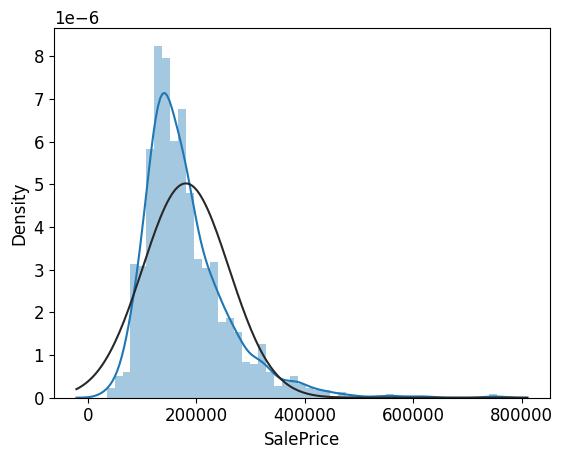

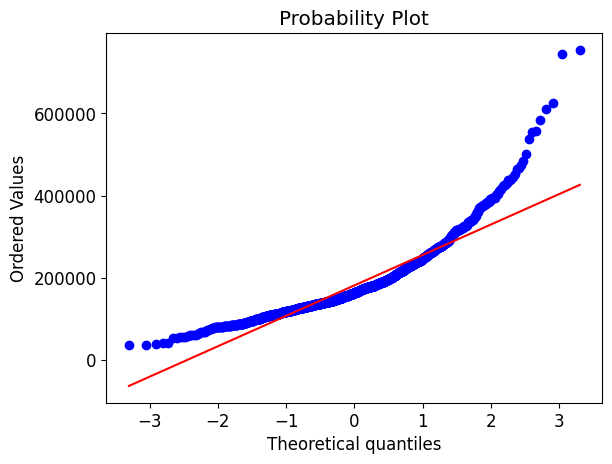

In [30]:
# target variable distribution
sns.distplot(df['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

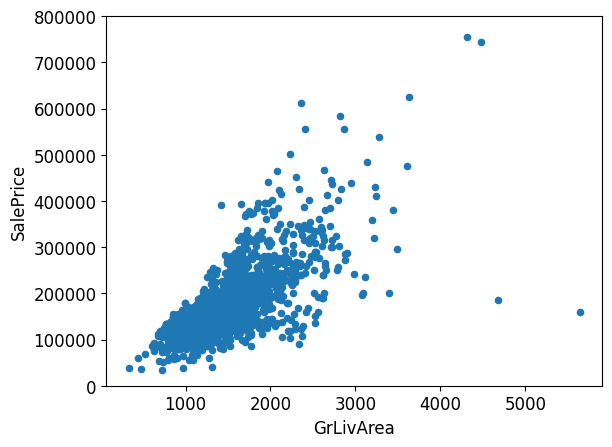

In [28]:
# some important variables graph 
var = 'GrLivArea'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

<Axes: xlabel='WoodDeckSF', ylabel='SalePrice'>

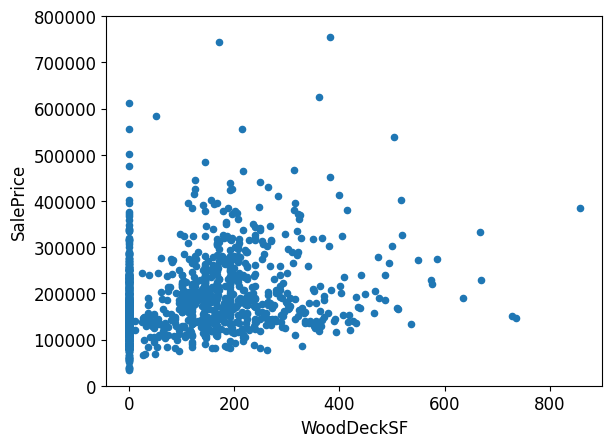

In [33]:
# some important variables graph 
var = 'WoodDeckSF'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

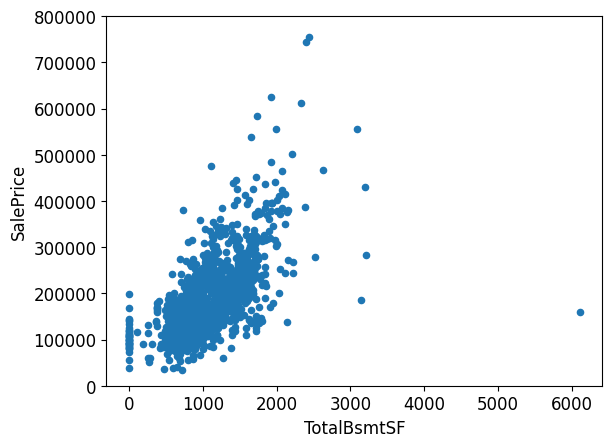

In [34]:
var = 'TotalBsmtSF'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

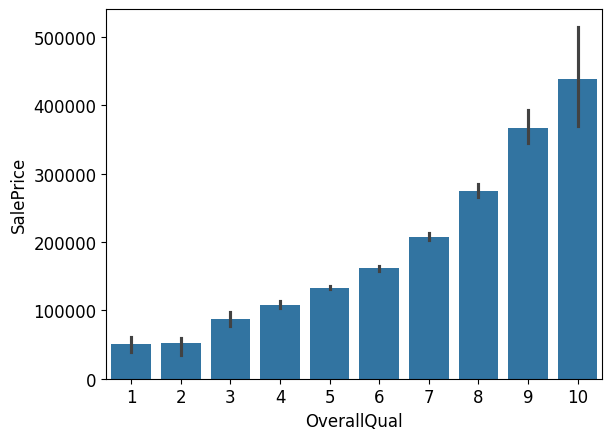

In [37]:
# categorical independent variables 
sns.barplot(x='OverallQual', y='SalePrice', data=df, estimator=np.mean)
plt.show()

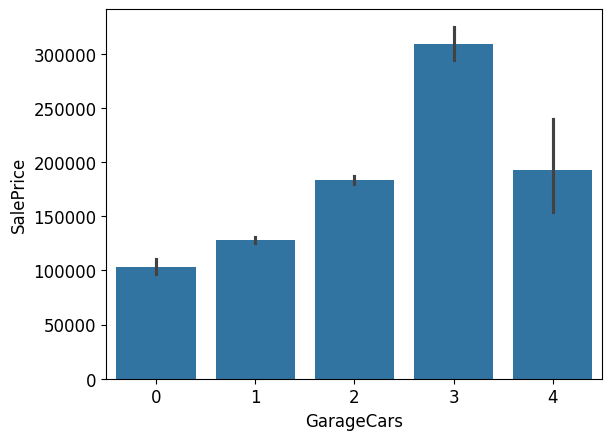

In [41]:
sns.barplot(x='GarageCars', y='SalePrice', data=df, estimator=np.mean)
plt.show()

In [ ]:
sns.barplot(x='GarageCars', y='SalePrice', data=df, estimator=np.mean)
plt.show()

### data reduction

In [50]:
# PCA dataset
t1 = temp.drop('SalePrice',axis = 1)
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize the variables
df_normalized = pd.DataFrame(scaler.fit_transform(t1), columns=t1.columns)



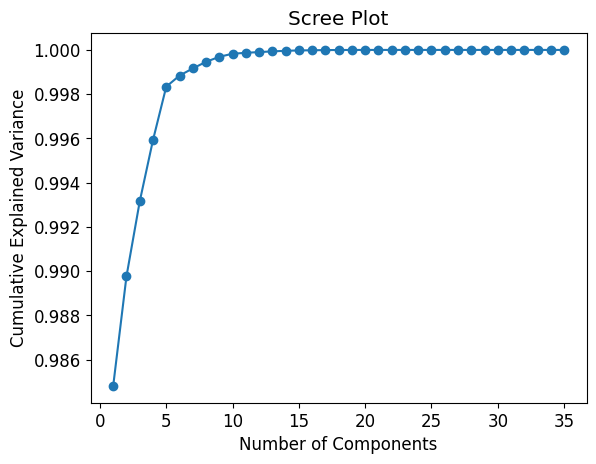

In [51]:
pca = PCA()
pca.fit(t1)
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()

In [53]:
pca = PCA(n_components=5) # Set the desired number of components
t1_reduced = pca.fit_transform(t1)
t1_reduced = pd.DataFrame(t1_reduced, columns=['PC1', 'PC2','PC3', 'PC4','PC5'])
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
# Print the explained variance ratio
print("Explained Variance Ratio:", explained_variance_ratio)

# Access the principal components (optional)
principal_components = pd.DataFrame(pca.components_, columns=t1.columns)

# Print the principal components
print("Principal Components:\n", principal_components)
principal_components.to_csv('principal_components.csv', index=False)


Explained Variance Ratio: [0.98480956 0.00494988 0.003388   0.00277569 0.0024149 ]
Principal Components:
    LotFrontage   LotArea  OverallQual   OverallCond  YearBuilt  YearRemodAdd  \
0     0.000673  0.999703     0.000015 -6.542154e-07   0.000045      0.000030   
1     0.011204 -0.022758     0.001320 -2.492239e-04   0.015829      0.010595   
2     0.001781 -0.005549    -0.000169 -1.013986e-04   0.008093     -0.000704   
3    -0.000191 -0.005526     0.000005  2.134507e-04  -0.001396     -0.000551   
4     0.000466 -0.002153    -0.000010  9.521208e-05  -0.000309      0.000401   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  GarageArea  WoodDeckSF  \
0    0.001884    0.009825    0.001797  -0.000102  ...    0.003884    0.002161   
1    0.118003    0.239068   -0.010014   0.253042  ...    0.173442    0.044010   
2    0.007410    0.519633    0.027882  -0.216768  ...    0.025860    0.010038   
3    0.030532    0.494574    0.010436  -0.699820  ...    0.010220    0.023996   
4   -0.0